# Kollokasjoner for nøkkelord

In [66]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.text as dh
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle
import pandas as pd
import networkx as nx
import wordgraph as wg
import dhlab.ngram as ng

In [2]:
css()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += ', '.join(categories['propr'])
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [4]:
import pandas as pd

In [5]:
import ast

In [6]:
#colls_before = pd.read_json('demokrati_before.json')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [9]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [49]:
reference = nb.frame(nb.totals(250000), 'freq')

In [11]:
keyword = 'abort'

In [12]:
filename = 'collocation_' + keyword + ".csv"

## Grafstruktur topos

In [32]:
keyword_graph = wg.word_graph(keyword, cutoff=24)

In [33]:
comm = gnl.community_dict(keyword_graph)

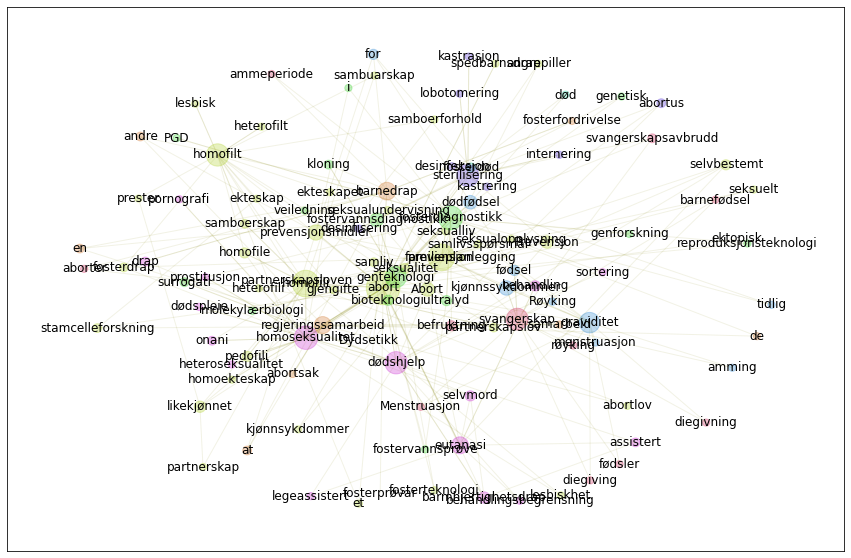

In [34]:
gnl.show_graph(keyword_graph, spread=1.2, fontsize=12)

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [35]:
pos=""
for x in comm:
    pos += "**" + x + "**\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n\n"
mu.printmd(pos)

**abort-prevensjon**
<span style='font-size:1.1em'>abort, prevensjon, homofili, homofilt, prevensjonsmidler, Abort, Prevensjon, likekjønnet, pedofili, selvbestemt, homofile, seksualitet, samboerskap, samliv, stamcelleforskning, partnerskapslov, fosterdrap, heterofilt, gjengifte, kjønnsykdommer, lesbiskhet, seksualopplysning, seksuelt, partnerskap, homoekteskap, partnerskapsloven, fosterteknologi, lesbisk, seksualundervisning, samlivsspørsmål, abortlov, prester, ekteskap, sambuarskap, angrepiller, heterofili, familieplanlegging, seksualliv, ekteskapet, spedbarnsdrap, et, samboerforhold, Dydsetikk, fosterprøvar, ektopisk</span>

**fosterdiagnostikk-genteknologi**
<span style='font-size:1.1em'>fosterdiagnostikk, genteknologi, fostervannsdiagnostikk, ultralyd, bioteknologi, kloning, surrogati, PGD, molekylærbiologi, veiledning, fostervannsprøve, genetisk, reproduksjonsteknologi, i, genforskning</span>

**fosterdød-død**
<span style='font-size:1.1em'>fosterdød, død</span>

**graviditet-kjønnssykdommer**
<span style='font-size:1.1em'>graviditet, kjønnssykdommer, dødfødsel, fødsel, for, tidlig, Røyking, amming, menstruasjon</span>

**sterilisering-abortus**
<span style='font-size:1.1em'>sterilisering, abortus, lobotomering, desinfisering, kastrering, kastrasjon, desinfeksjon, internering</span>

**homoseksualitet-dødshjelp**
<span style='font-size:1.1em'>homoseksualitet, dødshjelp, eutanasi, barmhjertighetsdrap, selvmord, behandling, onani, assistert, drap, sortering, heteroseksualitet, behandlingsbegrensning, prostitusjon, dødspleie, legeassistert, pornografi</span>

**svangerskap-befruktning**
<span style='font-size:1.1em'>svangerskap, befruktning, svangerskapsavbrudd, diegivning, diegiving, røyking, fødsler, aborter, ammeperiode, barnefødsel, Menstruasjon</span>

**barnedrap-regjeringssamarbeid**
<span style='font-size:1.1em'>barnedrap, regjeringssamarbeid, at, andre, en, de, fosterfordrivelse, samarbeid, abortsak</span>



In [54]:
gnl.show_cliques(keyword_graph)

(3, 1) gjengifte, sambuarskap, samboerskap, homoseksualitet, kjønnsykdommer, homofile, angrepiller, graviditet, seksualitet, homofili, lesbiskhet, sterilisering, partnerskap, Prevensjon, abort, partnerskapsloven, abortus, samboerforhold, partnerskapslov, seksualundervisning, Abort, homofilt, likekjønnet, onani, kjønnssykdommer, pedofili, fosterdrap, prevensjonsmidler, prevensjon

(3, 2) genteknologi, fosterteknologi, Abort, dødshjelp, kloning, fosterdiagnostikk, selvmord, assistert, reproduksjonsteknologi, barmhjertighetsdrap, bioteknologi, fostervannsdiagnostikk, genforskning, abort

(4, 1) homoseksualitet, seksualitet, prevensjon, homofili, abort



# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


In [39]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title='plot');

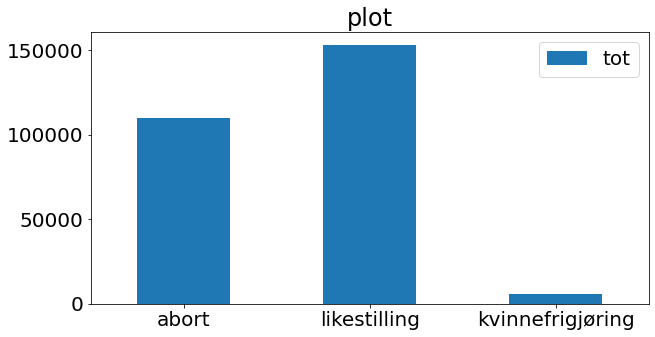

In [40]:
barchart([keyword, 'likestilling', 'kvinnefrigjøring'], reference);

In [26]:
keyword

'abort'

In [42]:
step = 5
corpus = {yf: dh.Corpus(doctype="digavis", fulltext=keyword, from_year = yf, to_year = yf + step, limit = 1000) for yf in range(1930, 2000, step)}

In [43]:
corpus[1930].corpus.head(5)

,dhlabid,urn,title,authors,oaiid,sesamid,isbn10,city,timestamp,year,publisher,langs,subjects,ddc,genres,literaryform,doctype
262,201124019,URN:NBN:no-nb_digavis_nationen_null_null_19310...,nationen,None,None,None,None,Oslo,19310113,1931,None,None,None,None,None,None,digavis
635,201932356,URN:NBN:no-nb_digavis_vestopland_null_null_193...,vestopland,None,None,None,None,Gjøvik,19300722,1930,None,None,None,None,None,None,digavis
631,202030350,URN:NBN:no-nb_digavis_bergensaftenbladbergenat...,bergensaftenbladbergenattenattini,None,None,None,None,Bergen,19341115,1934,None,None,None,None,None,None,digavis
390,200317764,URN:NBN:no-nb_digavis_dagbladet_null_null_1930...,dagbladet,None,None,None,None,Oslo,19300718,1930,None,None,None,None,None,None,digavis
5,200062050,URN:NBN:no-nb_digavis_akershusamtstidende_null...,akershusamtstidende,None,None,None,None,Frogn,19341213,1934,None,None,None,None,None,None,digavis


In [43]:
corpus[1990].corpus.head(5)

,dhlabid,urn,title,authors,oaiid,sesamid,isbn10,city,timestamp,year,publisher,langs,subjects,ddc,genres,literaryform,doctype
262,201124019,URN:NBN:no-nb_digavis_nationen_null_null_19310...,nationen,None,None,None,None,Oslo,19310113,1931,None,None,None,None,None,None,digavis
635,201932356,URN:NBN:no-nb_digavis_vestopland_null_null_193...,vestopland,None,None,None,None,Gjøvik,19300722,1930,None,None,None,None,None,None,digavis
631,202030350,URN:NBN:no-nb_digavis_bergensaftenbladbergenat...,bergensaftenbladbergenattenattini,None,None,None,None,Bergen,19341115,1934,None,None,None,None,None,None,digavis
390,200317764,URN:NBN:no-nb_digavis_dagbladet_null_null_1930...,dagbladet,None,None,None,None,Oslo,19300718,1930,None,None,None,None,None,None,digavis
5,200062050,URN:NBN:no-nb_digavis_akershusamtstidende_null...,akershusamtstidende,None,None,None,None,Frogn,19341213,1934,None,None,None,None,None,None,digavis


In [50]:
from time import time

collocations = dict()
t0 = time()
for year in corpus:
    try:
        collocations[year] = dh.Collocations(corpus[year], words=[keyword], reference=reference, before = 10, after = 10)
    except:
        print("gir opp", i)
    print(year, (time() - t0)/60, "minutter")

1930 0.027920826276143392 minutter
1935 0.05504873593648275 minutter
1940 0.07517893314361572 minutter
1945 0.10129671096801758 minutter
1950 0.1274659276008606 minutter
1955 0.15409018596013388 minutter
1960 0.17991257111231487 minutter
1965 0.20726530154546102 minutter
1970 0.23825972874959309 minutter
1975 0.2672296325365702 minutter
1980 0.2940990845362345 minutter
1985 0.3238488435745239 minutter
1990 0.35134713649749755 minutter
1995 0.378429106871287 minutter


In [61]:
def sub(c, count_cut = 5, number_cut = 300, relevance_cut = 40):
    return c[c['counts'] > count_cut][c.relevance > relevance_cut].sort_values(by='relevance', ascending=False).head(number_cut)

In [78]:
colls = pd.concat([collocations[x].coll for x in collocations], axis = 1, keys=collocations.keys()).fillna(0)

In [112]:
colls[[(x,'relevance') for x in collocations]].loc[['kunstig', 'illegal', 'legal','legalisert', 'fri', 'selvbestemt']].style.format("{0:,.0f}").background_gradient(axis = 1)

,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance
kunstig,"1,632",873,30,126,164,78,144,55,2,12,23,13,2,10
illegal,0,0,0,294,190,555,119,714,334,75,129,58,113,14
legal,7,12,0,189,472,375,424,390,89,45,21,16,21,12
legalisert,226,"1,271",0,727,0,841,774,"1,125",429,325,93,299,434,0
fri,3,5,0,4,3,2,6,130,151,101,114,45,33,35
selvbestemt,0,0,0,0,0,0,0,0,"28,010","31,499","30,851","12,896","9,925","15,143"


In [111]:
colls[[(x,'counts') for x in collocations]].loc[['kunstig', 'illegal', 'legal','legalisert', 'fri', 'selvbestemt']].style.format("{0:,.0f}").background_gradient(axis = 1)

,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
,counts,counts,counts,counts,counts,counts,counts,counts,counts,counts,counts,counts,counts,counts
kunstig,688,327,2,33,52,31,53,28,2,7,12,6,1,4
illegal,0,0,0,14,11,40,8,66,54,8,12,5,9,1
legal,2,3,0,32,97,96,101,128,51,17,7,5,6,3
legalisert,2,10,0,4,0,7,6,12,8,4,1,3,4,0
fri,9,16,0,8,8,7,17,543,"1,102",483,479,175,120,111
selvbestemt,0,0,0,0,0,0,0,0,"1,029",763,653,255,180,244


In [116]:
colls[[(x,'relevance') for x in collocations]].sort_values(by=(1995, 'relevance'), ascending=False).head(20).style.format("{0:,.0f}").background_gradient(axis = 1)

,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance
selvbestemt,0,0,0,0,0,0,0,0,"28,010","31,499","30,851","12,896","9,925","15,143"
AAN,0,0,0,0,0,0,0,0,0,166,950,"5,490","11,307","12,726"
prevensjonsveiledning,0,0,0,0,0,242,0,0,"1,079",818,375,802,219,"5,906"
Lahnstein,0,0,0,0,0,0,0,0,0,498,380,711,222,"3,492"
GRATIS,0,0,0,0,0,0,0,0,0,0,0,0,0,"3,016"
Folkeaksjonen,0,0,0,0,0,0,0,0,"8,759","20,163","6,244",872,792,"2,853"
abortloven,0,569,0,0,805,323,"1,040",839,"1,008","2,768","1,167","1,784","1,265","2,409"
svangerskapsuke,611,0,0,860,0,0,175,0,399,"1,155",315,741,"1,322","2,232"
15.30,0,0,0,0,0,0,0,0,0,0,33,0,38,"1,120"


In [123]:
colls[[(x,'relevance') for x in collocations]].sort_values(by=(1985, 'relevance'), ascending=False).head(20).style.format("{0:,.0f}").background_gradient(axis = 1)

,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance
selvbestemt,0,0,0,0,0,0,0,0,"28,010","31,499","30,851","12,896","9,925","15,143"
AAN,0,0,0,0,0,0,0,0,0,166,950,"5,490","11,307","12,726"
Genteknologi,0,0,0,0,0,0,0,0,0,0,0,"2,558",0,0
Nessa,0,0,0,0,0,0,0,0,0,0,103,"1,922","1,138",607
prevensjonsmiddel,0,0,0,0,0,0,0,0,727,"2,005",688,"1,842","1,339",151
abortloven,0,569,0,0,805,323,"1,040",839,"1,008","2,768","1,167","1,784","1,265","2,409"
Dynastiet,0,0,0,0,0,0,0,0,0,0,0,"1,523",0,0
22.10,0,0,0,0,0,0,0,87,0,0,172,"1,476",0,226
Skippergt,0,0,0,0,0,0,0,0,0,0,0,"1,280",0,0


In [65]:
dh.Concordance(corpus[1930], "NEAR(abort* kunstig*, 20)").show()

,link,concordance
681,URN:NBN:no-nb_digavis_arbeiderbladetoslo_null_null_19300923_47_260_1,Det foreslåes et tillegg til § 245 således at det blir adgang til kunstig abort ved lægehjelp på sykehus : 1....
486,URN:NBN:no-nb_digavis_norgeskvinner_null_null_19300722_10_58_1,... uttaler lægemøtet som sin opfatning at straffelovens bestemmelser om kunstig abort ikke dekker nutidens rettsopfatning på dette område . Lægemøtet...
132,URN:NBN:no-nb_digavis_ostlendingen_null_null_19300726_31_172_1,"... om at der gis lægene rett til å foreta kunstig abort , ikke bare av medisinske , men jgså av..."
186,URN:NBN:no-nb_digavis_soerlandet_null_null_19321119_26_271_1,"... et senere tidspunkt , betegner vi inngrepet som partus arte præmaturus ( kunstig fortidlig fødsel ) . Abortus provoeatus -..."
150,URN:NBN:no-nb_digavis_fremtiden_null_null_19300818_26_193_1,... De kunstige aborter florerer — synlig for Gud og hvermann — ganske åpent mellem oss . De florerer som en åpenbar hån...
599,URN:NBN:no-nb_digavis_telemarkarbeiderblad_null_null_19300730_9_174_1,"Man vil for det annet anse det heldig å inndele de forhold , hvorunder kunstig abort på ikke-medisinske indikasjoner bør..."
676,URN:NBN:no-nb_digavis_arbeiderbladetoslo_null_null_19300726_47_202_1,a ) For utførelse av kunstig abort må der ikke tas større honorar enn 25 kroner .
562,URN:NBN:no-nb_digavis_tvedestrandogomegnsavis_null_null_19300729_29_59_1,Det skal være koromissionens opgave saavidt mulig at indskrænke utførelsen av kunstig abort . Den skal derfor ha sin .
94,URN:NBN:no-nb_digavis_nationen_null_null_19300711_13_159_1,Derimot har det ikke lykkes komiteen aa komme til enighet om i hvilken utstrekning tilladelsen til utførelse av kunstig abort...
36,URN:NBN:no-nb_digavis_lofotposten_null_null_19341110_35_235_1,"... en mening om hvad som helst — her altså om kunstig abort , fosterdrap — ikke noen som helst forhøiet egenverdi ,..."


In [106]:
dh.Concordance(corpus[1990], "NEAR(abort* kunstig*, 20)").show()

,link,concordance
6,URN:NBN:no-nb_digavis_vaartland_null_null_19940513_50_108_1,"... kombinere kunstig befruktning med sæddonasjon . ¦ Sædgivers anonymitet opprettholdes . ¦ Det bes om en stortingsmelding om praktisering av abortloven ,..."
2,URN:NBN:no-nb_digavis_klassekampen_null_null_19920817_23_188_1,"... Abort er blitt en selvfølge , kunstig inseminasjon en rettighet , genteknologi gjør det mulig å operere syke fostre Øog..."
4,URN:NBN:no-nb_digavis_vaartland_null_null_19920206_48_31_1,... NÅR SAMFUNNET sier at Downs syndrom automatisk er gyldig grunn til provosert abort eller gir grunnlag for kunstig fødsel med...
3,URN:NBN:no-nb_digavis_bergenstidende_null_null_19940301_127_50_1,"... Ein vesentleg del av desse abortane er seinabortar , der fødselen vert sett kunstig i"
1,URN:NBN:no-nb_digavis_romsdalsbudstikke_null_null_19930609_150_128_1,"... Både kvinnen som tar abort for å kvitte seg med et uønsket foster , og kvinnen som lar seg kunstig..."
5,URN:NBN:no-nb_digavis_vaartland_null_null_19920612_48_133_1,"... holdt kunstig i live . I YNGSTE LAGET Birgit Høvik var 13 år i 1978 , da dagens abortlov ble..."
0,URN:NBN:no-nb_digavis_mossavis_null_null_19910529_115_119_1,... Kunstig abort er krig mot barn » . Denne krigen er også i ferd med å ramme de eldre og funksjonshemmede...


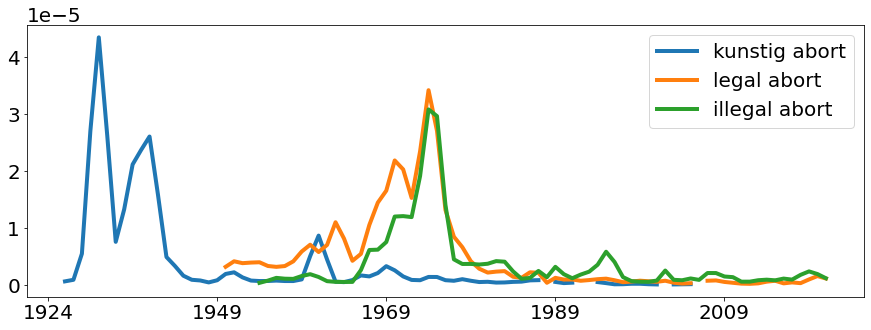

In [122]:
ng.Ngram(["kunstig abort", "legal abort", "illegal abort"],doctype='digavis', from_year = 1920).plot(lw=4, figsize=(15,5))

In [192]:
def show_matrix(df, column=0, top = 23):
    print(f"showing {df.columns[column]}")
    return df.sort_values(by=pmi.columns[column], ascending=False).head(top).fillna(0).round(0).style.format("{0:,.0f}").background_gradient(axis=0)


In [129]:
sub(collocations[1930].coll).index

Index(['provocatus', 'svangerskapets', 'Lægeforeningen', 'abortus',
       'henstiller', 'barselfeber', 'nutidens', 'preventiver',
       'fosterfordrivelse', 'frigivelse',
       ...
       'straffes', 'ansette', 'samleie', 'handlingen', 'tillått', 'utføre',
       'lovlig', 'sykehus', 'berettiget', 'kvinnens'],
      dtype='object', length=170)

In [130]:
words = [sub(collocations[x].coll).index for x in collocations]

In [132]:
words = [w for wrd in words for w in wrd]

In [135]:
pmi_w = colls[[(x,'relevance') for x in collocations]].loc[words]

In [138]:
pmi_w.columns = [x[0] for x in pmi_w.columns]

In [139]:
pmi_w

,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
provocatus,8335.609669,7974.431330,5353.612533,2010.848003,3317.028418,3104.580223,1190.203589,518.631214,395.618566,150.001797,343.322277,0.000000,0.000000,0.000000
svangerskapets,3834.774179,634.708492,0.000000,0.000000,1196.854707,0.000000,773.011581,280.699830,428.242888,487.114673,185.817016,298.352344,108.430644,366.130214
Lægeforeningen,3147.843345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,358.544399
abortus,3063.743196,2241.347234,3935.427550,985.446317,1625.559681,489.036294,349.966305,381.244544,436.227368,110.265956,0.000000,0.000000,147.269742,0.000000
henstiller,2674.249220,0.000000,0.000000,0.000000,0.000000,0.000000,210.672451,0.000000,21.883318,33.188908,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
medisinsk,73.540508,72.915941,11.245711,11.263878,25.548217,24.222455,30.001465,30.503990,14.958538,11.343287,5.769417,3.087839,20.199924,49.261102
fødsel,107.011762,47.231829,148.239380,16.872598,47.315216,129.505080,28.761826,29.591725,8.962788,18.124318,17.284465,11.100944,60.516493,47.679761
Leder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.414513,5.903414,46.511843
utfører,24.099897,15.499602,0.000000,0.000000,29.683907,9.159138,0.000000,5.712249,0.817008,3.717299,5.672072,16.696566,11.584475,40.979180


In [140]:
pmi_dot_year = pmi_w.transpose().dot(pmi_w)

In [151]:
pmi_dot_year.style.background_gradient()

,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
1930,634519611.791153,477272647.467056,369300992.092347,176533266.970302,238394312.373043,189447306.452958,112861118.402532,66700349.157528,62937015.396523,45154999.092324,43209828.019521,34661527.302046,36374716.246436,40183307.267112
1935,477272647.467056,649520325.749243,344522414.409825,177541310.624675,221268063.313063,200168307.213029,109786726.300695,65032288.870997,54489114.524902,46725349.055616,39105354.680690,32733663.742448,30935570.331965,31593459.957744
1940,369300992.092347,344522414.409825,1197636326.850649,260501568.251726,272572639.222675,197602190.191750,126402586.648936,84379088.429260,82378331.757962,52116097.527140,63600010.869455,37216361.031403,58052442.031824,40049362.972343
1945,176533266.970302,177541310.624675,260501568.251726,249818950.006527,130549478.641554,124386380.136126,96507496.758218,63320263.513280,56646370.192851,49701914.528921,46269086.919099,36188431.103251,51105967.411025,45190551.745317
1950,238394312.373043,221268063.313063,272572639.222675,130549478.641554,356932255.682671,186244140.561260,128111116.387471,59653863.456552,52300417.472993,59654603.729321,45282402.453836,40628176.949851,36536213.181742,42488744.210906
1955,189447306.452958,200168307.213029,197602190.191750,124386380.136126,186244140.561260,198982521.867320,112258108.529189,58695057.391453,49743841.179635,44769653.842322,37432699.867241,33581091.622131,36796052.170218,36174494.121274
1960,112861118.402532,109786726.300695,126402586.648936,96507496.758218,128111116.387471,112258108.529189,231921812.758319,61924775.496926,61239527.414522,71075152.677196,48394097.665418,58060035.149664,56166245.049586,64690641.180160
1965,66700349.157528,65032288.870997,84379088.429260,63320263.513280,59653863.456552,58695057.391453,61924775.496926,101345380.263365,79876129.843790,86447843.892913,70009370.258108,52497535.221480,57874561.933658,48815791.119951
1970,62937015.396523,54489114.524902,82378331.757962,56646370.192851,52300417.472993,49743841.179635,61239527.414522,79876129.843790,5199537593.035502,6306311585.836926,5546982235.420753,2283638913.612908,1778152397.136311,2751718905.300676
1975,45154999.092324,46725349.055616,52116097.527140,49701914.528921,59654603.729321,44769653.842322,71075152.677196,86447843.892913,6306311585.836926,8221765358.466364,6586470557.642447,2656173905.211669,2079523256.968904,3294150574.522182


In [217]:
pmi_dot

,sinnssykdommer,helsemyndighetene,boligmangel,hustruene,abortspørsmålet,vårsesjonen,oket,14.02,Sjøgata,distriktslægen,...,isolatet,regjeringas,Conny,Bøhle,lovforslaget,kvinneundertrykking,KrF,prenatal,byutvidelse,ekonomi
sinnssykdommer,346165.567313,39760.240493,166974.651120,480633.362843,0.000000e+00,0.000000,268826.306754,0.000000,0.000000,249024.664139,...,198614.022046,0.000000,0.000000,0.000000,3.418299e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000
helsemyndighetene,39760.240493,131842.494367,19178.546082,55358.612052,1.793135e+05,2408.848038,81563.623413,0.000000,25446.827792,28602.730802,...,97053.491290,2446.863261,0.000000,829.985003,1.201543e+05,8.282229e+03,17978.250573,4364.465813,0.000000,34383.829603
boligmangel,166974.651120,19178.546082,80541.038015,231835.848667,0.000000e+00,0.000000,129669.681276,0.000000,0.000000,120118.262303,...,95802.443022,0.000000,0.000000,0.000000,1.648833e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000
hustruene,480633.362843,55358.612052,231835.848667,667644.410292,3.363638e+04,0.000000,373770.742179,0.000000,0.000000,345758.137313,...,275765.513204,769.348327,0.000000,0.000000,4.749435e+05,1.949067e+03,3209.051564,1819.250026,0.000000,0.000000
abortspørsmålet,0.000000,179313.503358,0.000000,33636.375327,1.526909e+07,746486.421386,114012.835691,105016.814082,207318.787370,0.000000,...,0.000000,725330.904735,0.000000,255437.830148,1.455668e+06,1.804042e+06,668327.953079,376761.147410,0.000000,224195.668958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kvinneundertrykking,0.000000,8282.228569,0.000000,1949.066899,1.804042e+06,126822.747890,11900.711647,0.000000,8973.481175,0.000000,...,0.000000,153100.684381,0.000000,3512.196424,3.057521e+05,6.044416e+05,42495.922325,16445.902850,0.000000,12124.994526
KrF,0.000000,17978.250573,0.000000,3209.051564,6.683280e+05,3502.223206,5635.799905,17533.329447,75473.945311,0.000000,...,0.000000,11637.691114,0.000000,542.125733,2.422571e+04,4.249592e+04,101609.186749,43907.645969,0.000000,92642.011499
prenatal,0.000000,4364.465813,0.000000,1819.250026,3.767611e+05,4822.751849,3458.028400,7099.897057,9977.916272,0.000000,...,0.000000,7529.586456,0.000000,2809.943909,1.174125e+04,1.644590e+04,43907.645969,27463.692394,0.000000,9700.640396
byutvidelse,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,434815.963556,0.000000,0.000000,0.000000,...,0.000000,0.000000,214784.829735,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,641494.056691,0.000000


In [221]:
import pandas as pd

In [256]:
graph_dot = nx.from_pandas_adjacency(pmi_dot)

In [142]:
graph = nx.from_pandas_adjacency(pmi_dot_year)

In [254]:
graph_agg = nx.from_pandas_adjacency(agg_dot_year)

In [143]:
graph.nodes()

NodeView((1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995))

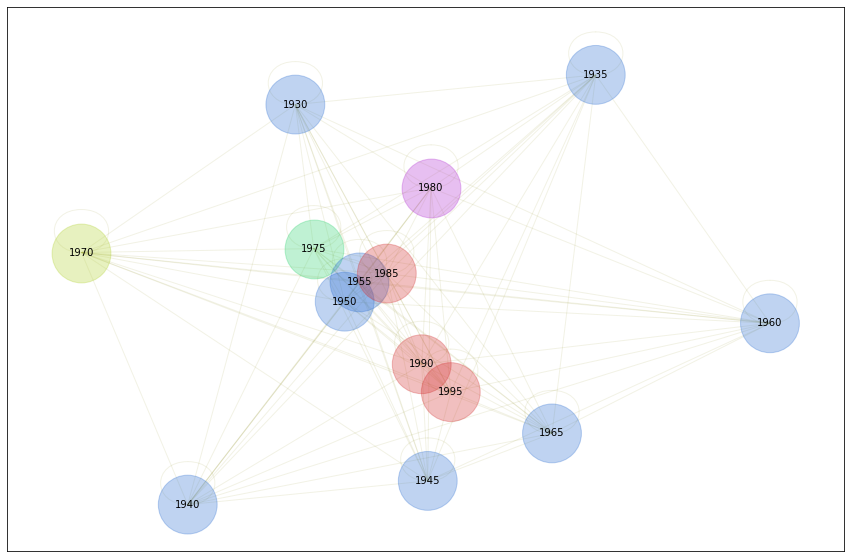

In [146]:
gnl.show_graph(graph)

In [149]:
from collections import Counter
def community_dict(G):
    sorter = Counter(dict(nx.degree(G)))
    cd = {}
    for c in gnl.mcommunity(G):
        l = [(x, sorter[x]) for x in c if sorter[x] > 0]
        # print(l)
        l.sort(key=lambda i: i[1], reverse=True)
        # print(l)
        cd['-'.join([str(x[0]) for x in l[:2]])] = [x[0] for x in l]
    return cd

def show_communities(G):
    Gc = community_dict(G)
    for c, value in Gc.items():
        print(str(c), ': ', ', '.join([str(v) for v in value]))
        print()

In [150]:
show_communities(graph)

1970 :  1970

1975 :  1975

1955-1960 :  1955, 1960, 1930, 1965, 1935, 1940, 1945, 1950

1980 :  1980

1985-1995 :  1985, 1995, 1990



In [258]:
gnl.show_cliques(graph_dot_y)

KeyboardInterrupt: 

In [149]:
nb.concordance(word="Programpost", corpus='avis', yearfrom='1980', yearto='1985', size=1)

aftenposten-19850509,Et nytt borgerlig parti KONTAKTPARTIET,Programpost,"2 , Innvandringsloven . Formuleringen"
aftenposten-19850514,annonser fra det borgelige KONTAKTPARTIET,Programpost,"2. Forelobig bare formålsparagrafen ,"
aftenposten-19831215,"Knudsen , dosent , Oslo",Programpost,karakterer Hr. redaktør . Javisst
bergenstidende-19850218,? . Vassrett : 1.,Programpost,i Fjernsynet 10. Tidsrom 11.


In [53]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(50).index

Index(['selvbestemt', 'sjølbestemt', 'Folkeaksjonen', 'AAN', 'abortloven',
       'aborter', 'Øog', 'ufødte', 'Kr.F', 'sjølvbestemt', 'Abort',
       'svangerskapsuke', 'abortlov', 'Nessa', 'Folkepartis',
       'svangerskapsavbrudd', 'Selvbestemt', 'fosterets', 'abortsaken',
       'prevensjonsmiddel', 'høyesterett', 'abortspørsmålet',
       'regjeringssamarbeid', '22.10', 'fosterdrap', 'Folkebevegelsen',
       'abortinngrep', 'homoseksualitet', 'Ofring', '21.00', 'pornografi',
       'Kirkemøtet', 'Nattverd', 'homofili', 'menneskeverdet', 'sjølvvald',
       'Hercz', 'dødshjelp', 'pft', 'Kvinnefronten', 'nødløsning',
       'abortsøkende', 'aborttallene', 'Korvald', '20.45', 'Senterpartiets',
       'sterilisering', 'innvilges', 'svangerskapets', 'barnefaren'],
      dtype='object')

In [54]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(50).index

Index(['Øog', 'aborter', 'eugeniske', 'kjennskapet', 'Dahlseng', 'sterilitet',
       'sterilisering', 'blodskam', 'Svangerskap', 'arvemessige',
       'svangerskapets', 'spirende', 'framkalle', 'innlater', 'provocatus',
       'Munkebye', 'Indikasjoner', 'framkalt', 'svangre', 'brennaktuelle',
       'velgjerning', 'Straffelovrådet', 'besvangring', 'prinsipale', 'Lovlig',
       'Tande', 'pA', 'fullføres', 'abortene', 'sjeleleg', 'kvaksalvere',
       'Margareth', 'mislykte', 'nødutvei', 'aborten', 'hustruene', 'ufødte',
       'barnerente', 'fødselskontroll', 'kjønnssykdommer', 'Blakely',
       'legalisering', 'sykestue', 'legalisert', 'Aborter', 'påbegynte',
       'Furuhjelm', 'oket', 'krenkt', 'kurator'],
      dtype='object')

In [38]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(50).index

Index(['Abortus', 'abortus', 'aborter', 'provocatus', 'framkalt', 'Abort',
       'habituell', 'svangerskapsavbrytelse', 'abortere', 'Truende', 'Illegal',
       'Habituell', 'Framkalt', 'aborten', 'fosterfordrivelse', 'Spontan',
       'Kunstig', 'framkalle', 'barnemord', 'Kriminell', 'sterilisering',
       'abortion', 'barselseng', 'sterilisasjon', 'sterilitet', 'abonnent',
       'barselfeber', 'Barselfeber', 'puerperalis', 'Fosteret', 'lovstridig',
       'blodforgiftning', 'febrilis', 'misfoster', 'Fødselskontroll',
       'blødningen', 'Fosterfordrivelse', 'innvilges', 'abonnere',
       'avbrytelse', 'Fremkalt', 'couche', 'incipiens',
       'Svangerskapsavbrytelse', 'aborterer', 'incompletus', 'legalis',
       'ABORT', 'utstøtning', 'pessar'],
      dtype='object')

# Assosiasjoner og variasjon over år.

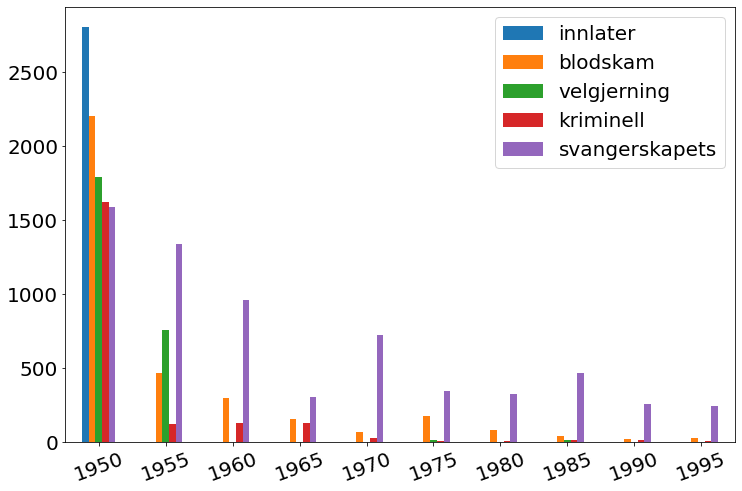

In [138]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [56]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

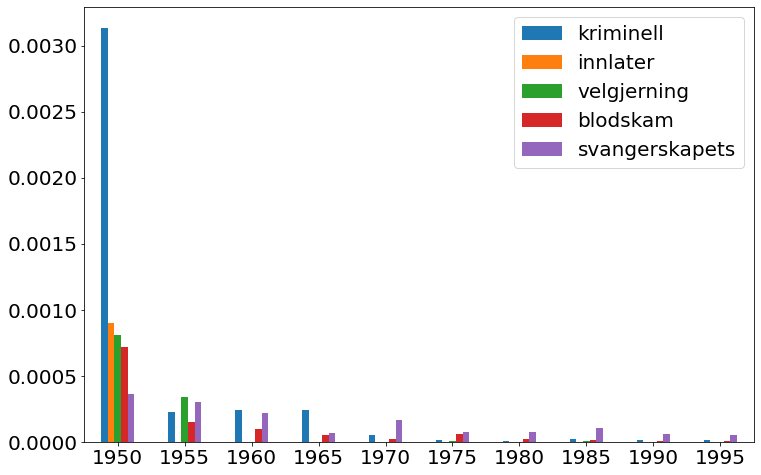

In [139]:
freq_assoc_val(agg, pmi, 0)

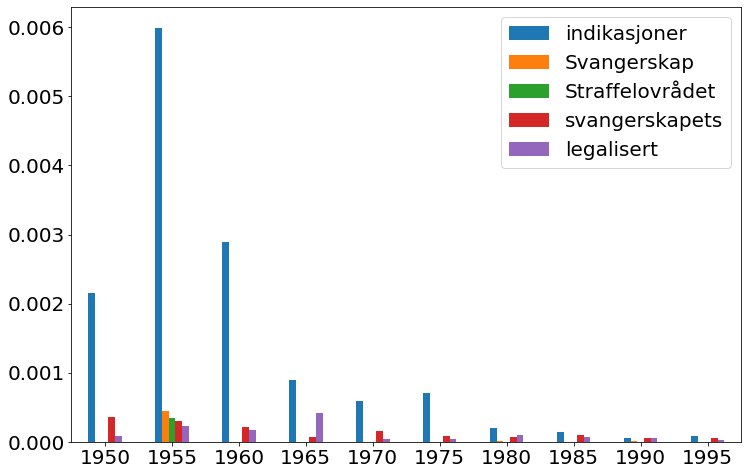

In [140]:
freq_assoc_val(agg, pmi, 1)

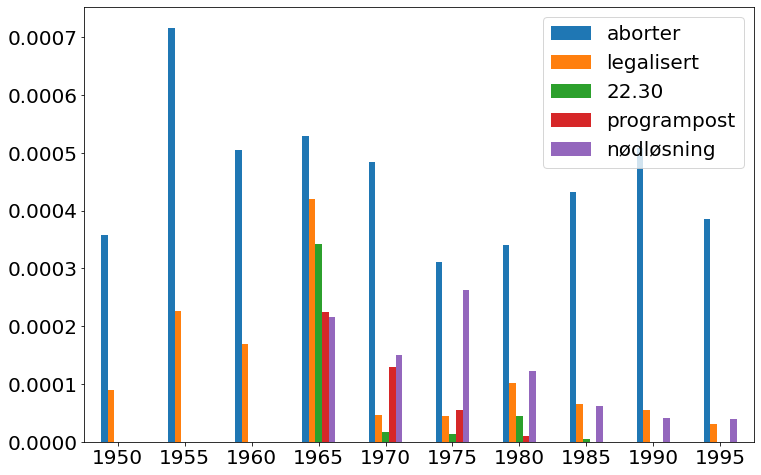

In [141]:
freq_assoc_val(agg, pmi, 3)

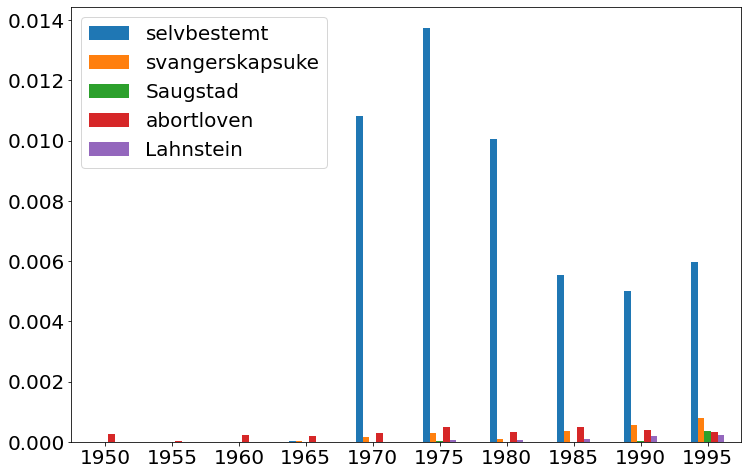

In [143]:
freq_assoc_val(agg, pmi, 9)

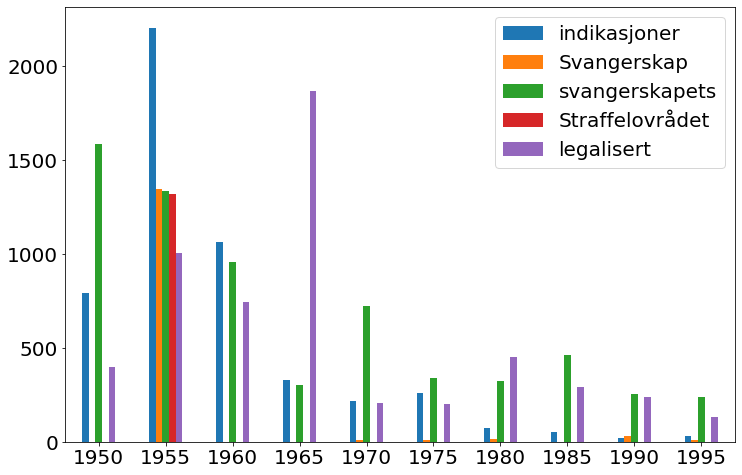

In [144]:
freq_assoc_val(pmi, pmi, 1)

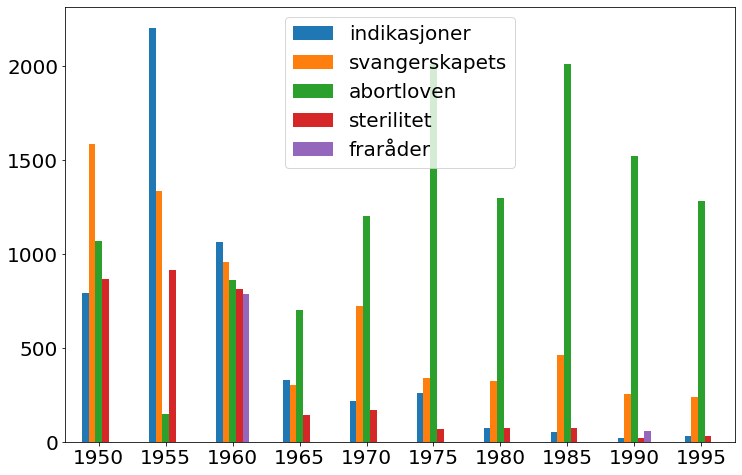

In [145]:
freq_assoc_val(pmi, pmi, 2)

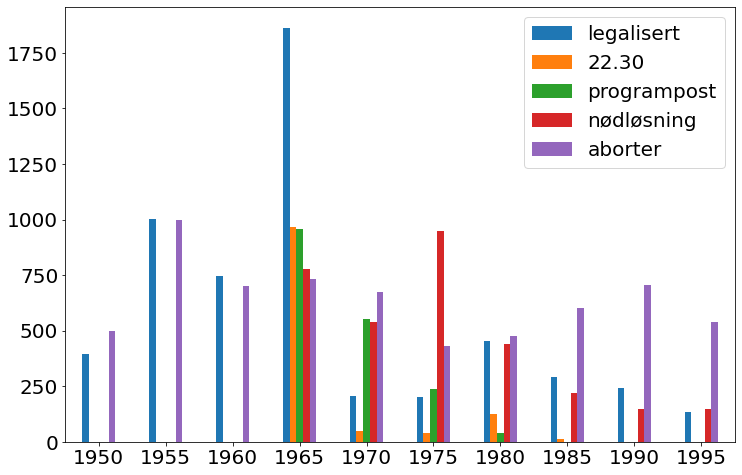

In [146]:
freq_assoc_val(pmi, pmi, 3)

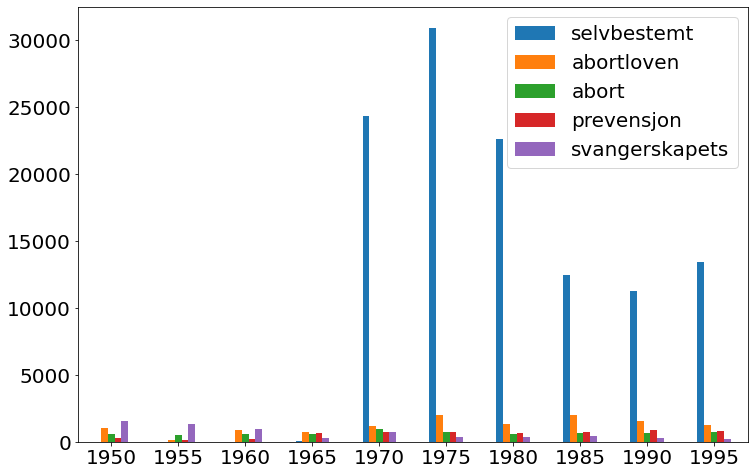

In [147]:
freq_assoc_val(pmi, pmi, 4)

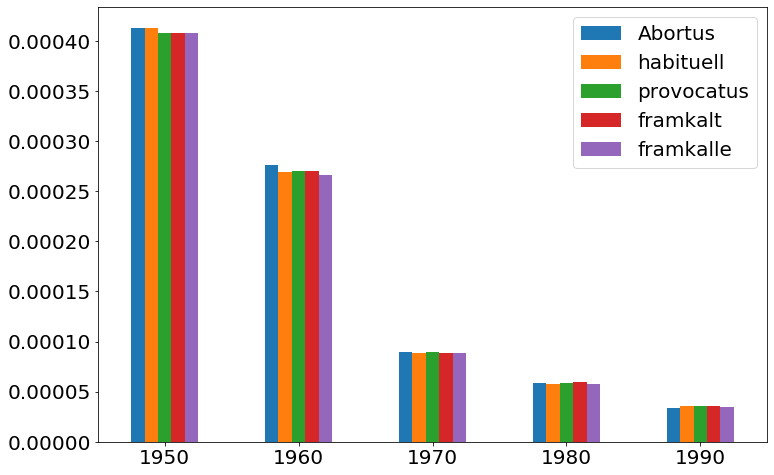

In [49]:
freq_assoc_val(pmi, pmi, 0)

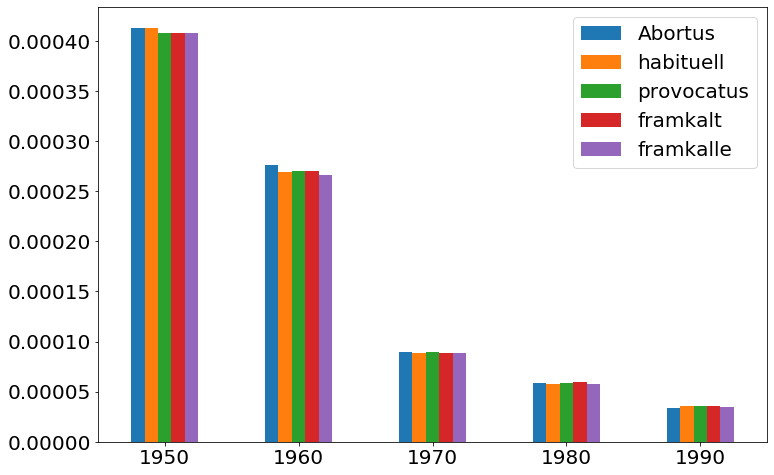

In [50]:
freq_assoc_val(pmi, pmi, 0)

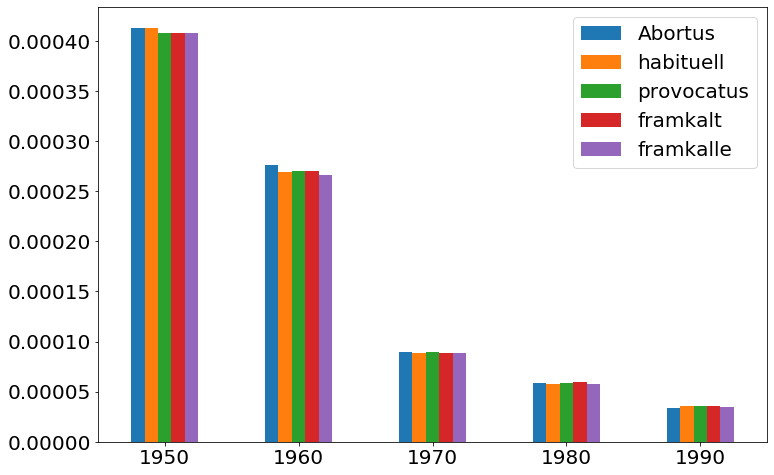

In [51]:
freq_assoc_val(pmi, pmi, 0)

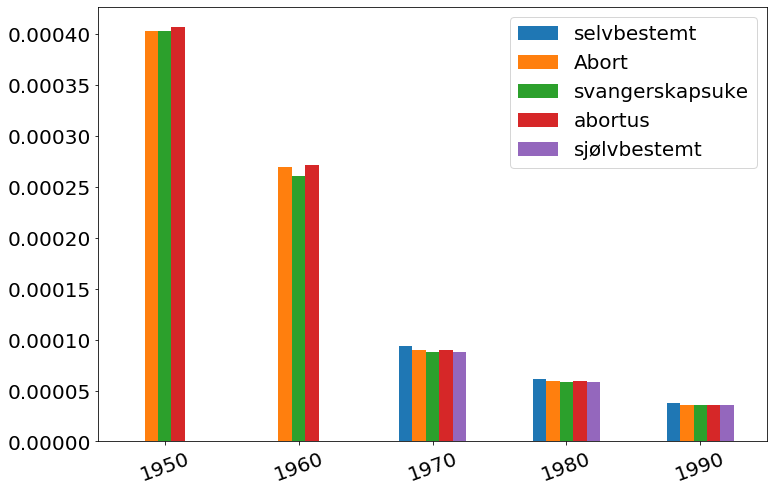

In [52]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

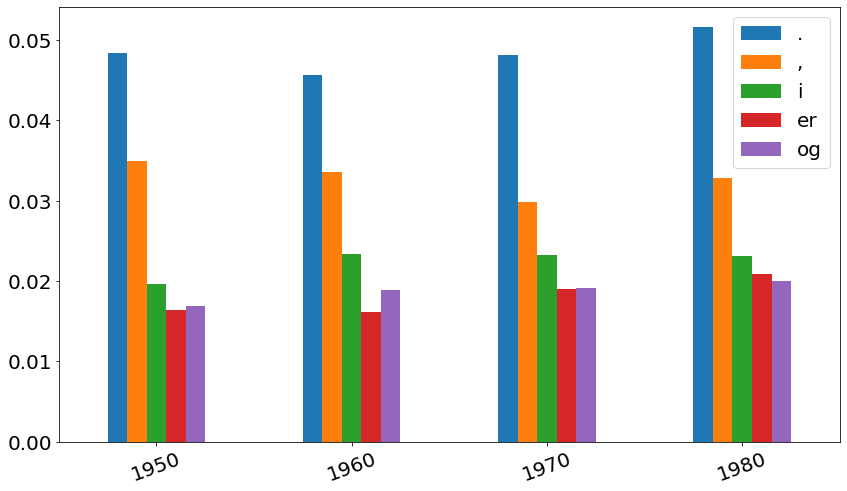

In [64]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [67]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
Folkeaksjonen, Selvbestemt, Øog, Kvinnefronten, Kvinneaksjonen, Sjølbestemt, Hauglin, Abort, Tungesvik, Folkepartis, SVs, Opplysningsutvalget, Kr.F, Korvald, 13.45, Valgforbund, Senterpartiets, 19.15, Provosert, Aksjonen, Folkepartiet, Dagsnytt, Kvinnefrontens, Brekken, Svindland, Folkeaksjon, Programledere, Unneberg, Benkow, NTB-Reuter, Prevensjon, Fjose, 19.30, Hoyre, Aksjon, Blegen, Senterungdommen, RADIO

## adj
<span style='font-size:1.1em'>selvbestemt, sjølbestemt, abortsøkende, ufødte</span>
## verb
<span style='font-size:1.1em'>aborter, programfestet, innvilges, innvilge, programfeste, framkalt, legalisere</span>
## unknown
<span style='font-size:1.1em'>sjølvbestemt, sjølvvald, prevensjonsveiledning, abortspørsmålet, svangerskapsavbrytelse, soke, abortsaken, fosterets, svangerskapets, svangerskapsuke, sjolbestemt, sjølvald, stortingsperiode, soker, sporsmålet, soknader, abortdebatten, abortinngrep, abortlovgivningen, utfore, provocatus, sokte, sporsmål, sterilisering, kvinnerett, losning, reservasjonsrett, abortus, abortnemnda, sjolvvald</span>
## subst
<span style='font-size:1.1em'>abortlov, abortloven, folkeaksjonen, prevensjonsmiddel, daghjem, nødløsning, pornografi, kvinnesak, menneskeverdet, prevensjonsmidler, programpost, svangerskapsavbrudd, underskrifter, programposten, seksualopplysning, folkeaksjon, fosterdrap, porno, forkjemperne, sterilitet, familieplanlegging</span>


# Hvordan utvikler ordene seg?

In [72]:
barchart = lambda w, title='', df=pmi: df.loc[[ws for ws in w if ws in df.index]].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

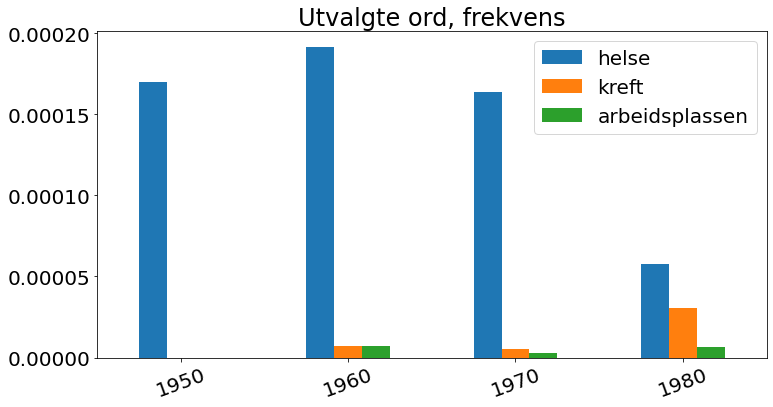

In [73]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, frekvens', df=agg);

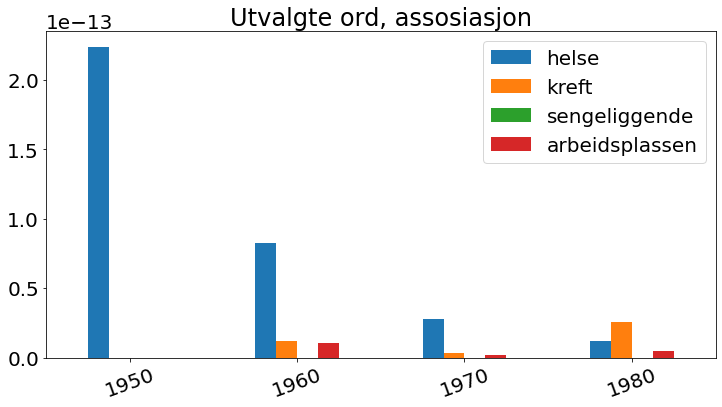

In [74]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, assosiasjon');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

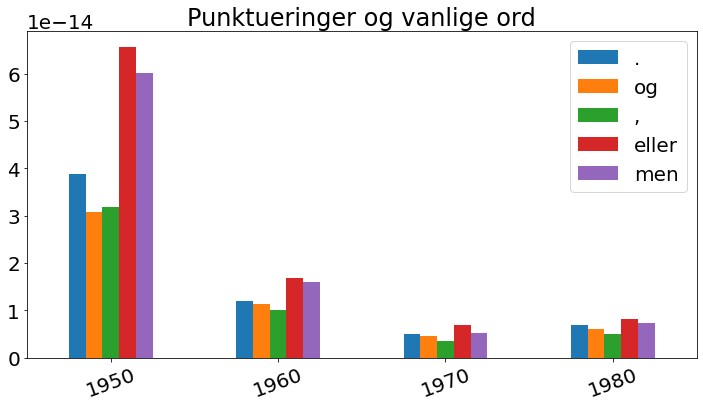

In [75]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', pmi);

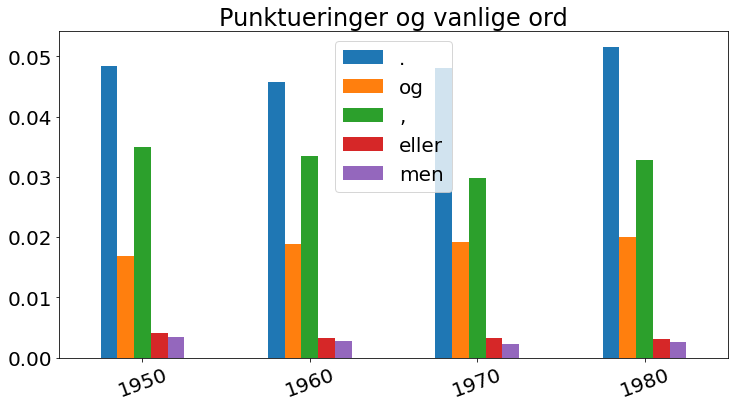

In [76]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', agg);

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [77]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

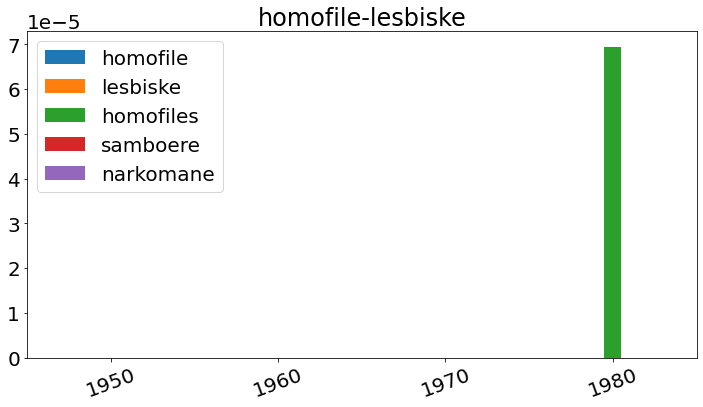

In [78]:
commchart(2, (0,5));

<AxesSubplot:title={'center':'prevensjon-familieplanlegging'}>

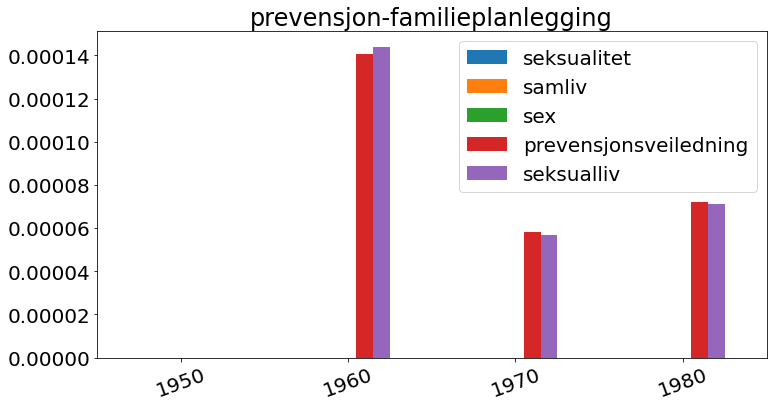

In [79]:
commchart(1, (3, 8))

<AxesSubplot:title={'center':'homofili-homofilt'}>

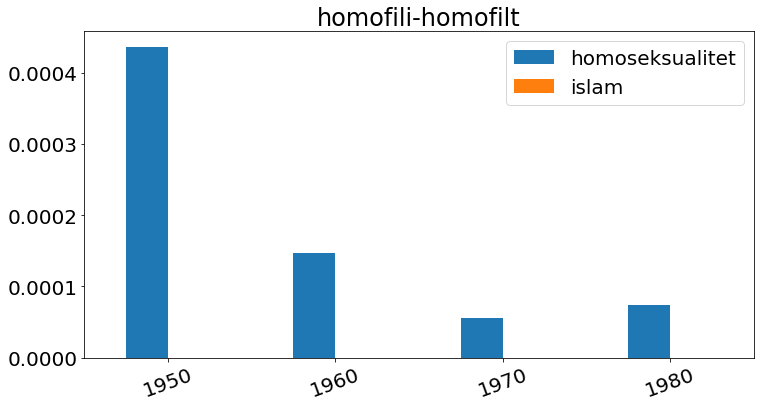

In [81]:
commchart(3, (3, 8))

<AxesSubplot:title={'center':'homofili-homofilt'}>

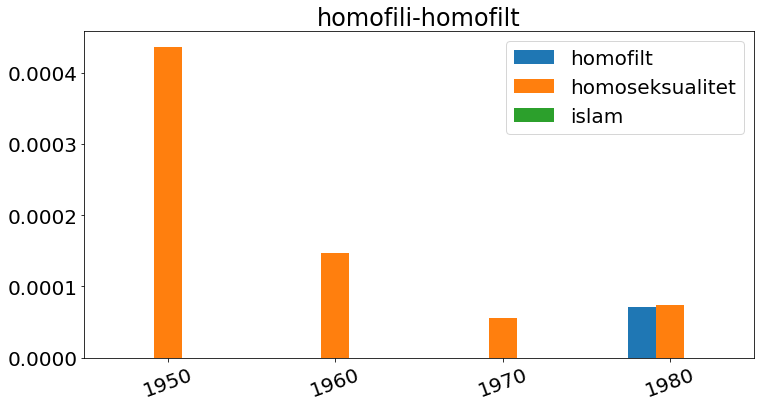

In [80]:
commchart(3)